Cat and Dog image classification using CNN

In [19]:
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

num_classes = 2 # cat,dog

# Create a Sequential model with your provided architecture
model = Sequential()
model.add(Conv2D(input_shape=(224, 224, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation and preprocessing for training
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Scale pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load your training data using ImageDataGenerator
train_data_dir = '/content/drive/MyDrive/dataset cat-dog/train'
batch_size = 32
epochs = 10

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)
# Data augmentation and preprocessing for validation
validation_datagen = ImageDataGenerator(
    rescale=1.0 / 255  # Scale pixel values to [0, 1]
)

# Load your validation data using ImageDataGenerator
validation_data_dir = '/content/drive/MyDrive/dataset cat-dog/validation'
batch_size = 32  # You can choose an appropriate batch size
# No data augmentation for validation data

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)


# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=6, verbose=1, restore_best_weights=True)

# Define ModelCheckpoint callback to save the best model
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)



Found 388 images belonging to 2 classes.
Found 44 images belonging to 2 classes.


In [20]:
# Train the model with early stopping
model.fit(
    train_generator,
    epochs=epochs,
    steps_per_epoch=len(train_generator),
    verbose=1,
    callbacks=[early_stopping, model_checkpoint],
    validation_data=validation_generator  # Make sure to define the validation generator
)



Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 0.7215 - accuracy: 0.5644

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 14s 555ms/step - loss: 0.7215 - accuracy: 0.5644 - val_loss: 0.6921 - val_accuracy: 0.5227
Epoch 2/10
13/13 [==============================] - 9s 644ms/step - loss: 0.6880 - accuracy: 0.5619 - val_loss: 0.6950 - val_accuracy: 0.5227
Epoch 3/10
13/13 [==============================] - 8s 553ms/step - loss: 0.6865 - accuracy: 0.5619 - val_loss: 0.6949 - val_accuracy: 0.5227
Epoch 4/10
13/13 [==============================] - 9s 661ms/step - loss: 0.6858 - accuracy: 0.5619 - val_loss: 0.6949 - val_accuracy: 0.5227
Epoch 5/10
13/13 [==============================] - 7s 576ms/step - loss: 0.6866 - accuracy: 0.5619 - val_loss: 0.6932 - val_accuracy: 0.5227
Epoch 6/10
13/13 [==============================] - 9s 648ms/step - loss: 0.6860 - accuracy: 0.5619 - val_loss: 0.6940 - val_accuracy: 0.5227
Epoch 7/10
13/13 [==============================] - 8s 594ms/step - loss: 0.6872 - accuracy: 0.5619 - val_loss: 0.6990 - val_accuracy: 0.5227
Epoch 7: early s

In [21]:
# Data augmentation and preprocessing for testing
test_datagen = ImageDataGenerator(
    rescale=1.0 / 255  # Scale pixel values to [0, 1]
)

# Load your testing data using ImageDataGenerator
test_data_dir = '/content/drive/MyDrive/college/dataset-cnn/test_set'
batch_size = 32  # You can choose an appropriate batch size

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Evaluate the model on the testing dataset
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


Found 464 images belonging to 2 classes.
15/15 [==============================] - 2s 115ms/step - loss: 0.6940 - accuracy: 0.4978
Test Loss: 0.6940220594406128
Test Accuracy: 0.4978448152542114


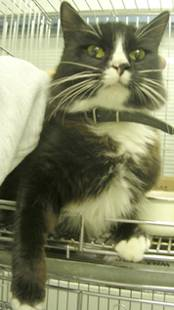

1/1 [==============================] - 0s 26ms/step
Predicted Class: Cat (Confidence: 72.31%)


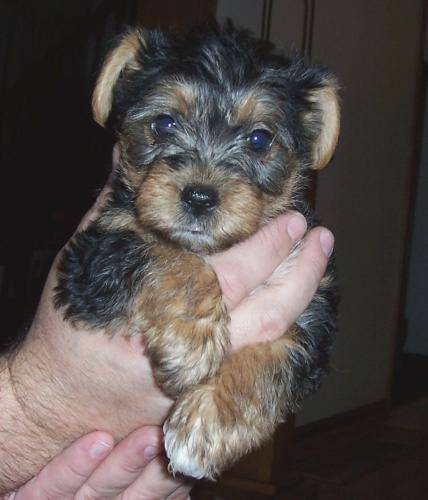

Predicted Class: Dog (Confidence: 61.31%)
1/1 [==============================] - 0s 34ms/step


In [23]:
def predict_with_model_binary(model, image_path, threshold=0.5):
    # Load and preprocess the image
    processed_image = load_and_preprocess_image(image_path)

    # Get model predictions
    predictions = model.predict(processed_image)

    # Interpret the binary classification output
    class_label = "Cat" if predictions[0, 0] > threshold else "Dog"
    confidence = predictions[0, 0] if class_label == "Cat" else predictions[0, 1]

    # Print the prediction
    print(f"Predicted Class: {class_label} (Confidence: {confidence:.2%})")

# Path to the image you want to predict
image_path_cat = "/content/drive/MyDrive/dataset cat-dog/test/cat/cat.4007.jpg"
img_cat = cv2.imread(image_path_cat)
cv2_imshow(img_cat)

# Make predictions for cat image
predict_with_model_binary(model, image_path_cat)

image_path_dog = "/content/drive/MyDrive/dataset cat-dog/test/dog/dog.4002.jpg"
img_dog = cv2.imread(image_path_dog)
cv2_imshow(img_dog)

# Make predictions for dog image
predict_with_model_binary(model, image_path_dog)
